# Parameter space scan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

plt.rcParams.update({'font.size': 14, 
                    'xtick.labelsize':14,
                    'ytick.labelsize':14,
                    'axes.labelsize': 14,
                    'axes.titlesize':14})


In [18]:
def get_count(x,true_false):
    my_sum=0
    for i in x:
        if i == true_false:
            my_sum+=1
    return my_sum



def plot_param_space(filename):
    
    #load the data
    df = pd.read_csv(filename)
    
    #get total number of simulations
    number_simulations = len(df['loop_step'].unique())
    
    #get columns containing true/false/not_all_assigned
    guac_cols = [col for col in df.columns if 'guac_' in col]

    #make it a string
    for gc in guac_cols:
        df[gc] = df[gc].apply(lambda x: str(x).lower())

    #create a 3x3 grid to contain different standard deviations and and different assumptions 
    #about town people counts
    nrows=3
    ncols=3
    fig, axes = plt.subplots(nrows, ncols, figsize=(12,12), sharex=True, sharey=True)

    #extract the scenario from the filename
    scenarios = ['a-close-call', 'a-lot-of-contenders', 'one-clear-winner']
    for scenario in scenarios:
        if scenario in filename: break
            
    if 'fullness_factor' in filename:
        scenario = scenario + ', fullness_factor=1'
        
    if 'condorcet_' in filename:
        scenario = scenario + ', winner by condorcet'

    if 'sum_' in filename:
        scenario = scenario + ', winer by sum'
        
    print(scenario)
        
    

    #loop over standard deviations
    counter_std = 0
    for std in df['standard_dev'].unique():
        df_std = df[df['standard_dev']==std].copy()

        #loop over number of townpeople
        counter_nt = 0
        for nt in df['number_town_people'].unique():
            
            df_nt = df_std[df_std['number_town_people'] == nt].copy()
            df_nt.set_index(['loop_step'], inplace = True)
            df_nt = df_nt[guac_cols].copy()

            #transpose it to count the different options
            df_ntt = df_nt.T        
            df_ntt['num_true'] = df_ntt.apply(lambda x: 100.*get_count(x,'true')/number_simulations,1)
            df_ntt['num_false'] = df_ntt.apply(lambda x: 100.*get_count(x,'false')/number_simulations,1)
            df_ntt['num_not_all_assigned'] = df_ntt.apply(lambda x: 100.*get_count(x,'not_all_assigned')/number_simulations,1)

            df_ntt['guac_id'] = df_ntt.index
            df_ntt['guac_id'] = df_ntt['guac_id'].apply(lambda x: int(x.split('_')[-1]))

            #plot the different configurations as stacked bar plots
            axes[counter_nt,counter_std].bar(df_ntt['guac_id'].tolist(), 
                                             df_ntt['num_true'].tolist(), 
                                             color = 'teal', 
                                             label = 'winner recovered'
                                            )
            axes[counter_nt,counter_std].bar(df_ntt['guac_id'].tolist(), 
                                             df_ntt['num_false'].tolist(), 
                                             bottom = df_ntt['num_true'].tolist(), 
                                             color = 'orange', 
                                             label = 'winner not recovered'
                                            )
            axes[counter_nt,counter_std].bar(df_ntt['guac_id'], 
                                             df_ntt['num_not_all_assigned'], 
                                             bottom = df_ntt['num_true'] + df_ntt['num_false'], 
                                             color = 'red', 
                                             label = 'not all guacs assigned'
                                            )
            #fix the limit on the y axis to allow comparisons
            axes[counter_nt,counter_std].set_ylim(0, 120)
            
            #add parameters to the figure
            if counter_nt == 0 and counter_std == 1:
                axes[counter_nt,counter_std].set_title(f"{scenario}\n\nTownpeople = {nt}, std = {std}")
            else:
                axes[counter_nt,counter_std].set_title(f"Townpeople = {nt}, std = {std}")

            #add legend
            axes[counter_nt,counter_std].legend(loc=4, fontsize=12)

            #add labels
            if counter_std == 0:
                axes[counter_nt,counter_std].set_ylabel('%')
            if counter_nt == ncols-1:
                axes[counter_nt,counter_std].set_xlabel('# guacs tasted')

            counter_nt+=1
        counter_std+=1
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.1, 
                        hspace=0.2)  
    plt.savefig(f"../plots/{re.sub('.csv', '', f.split('/')[-1])}_viz.png")

a-lot-of-contenders, winner by condorcet
a-lot-of-contenders, winer by sum
one-clear-winner, winner by condorcet
one-clear-winner, winer by sum


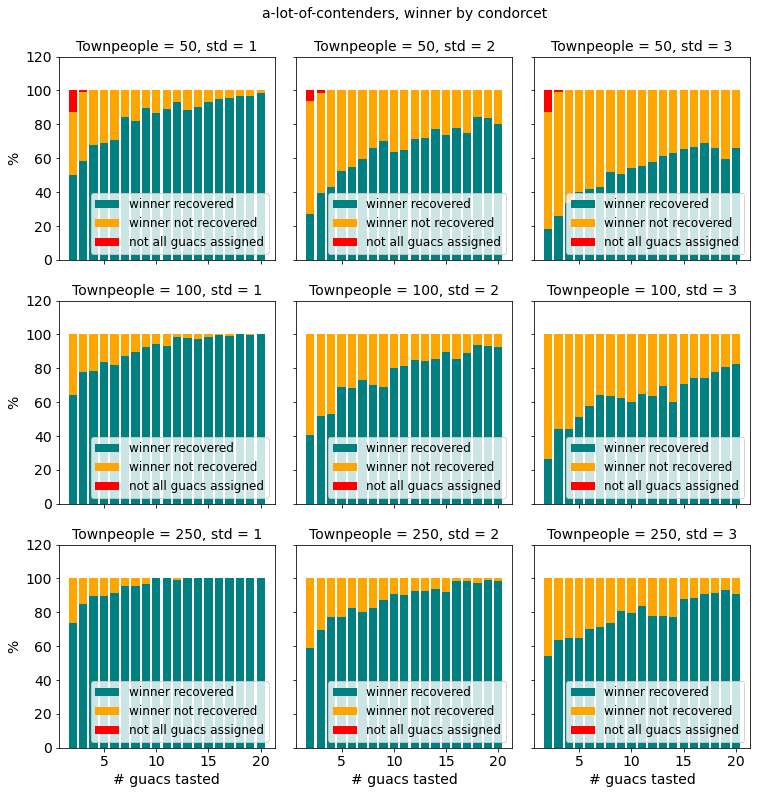

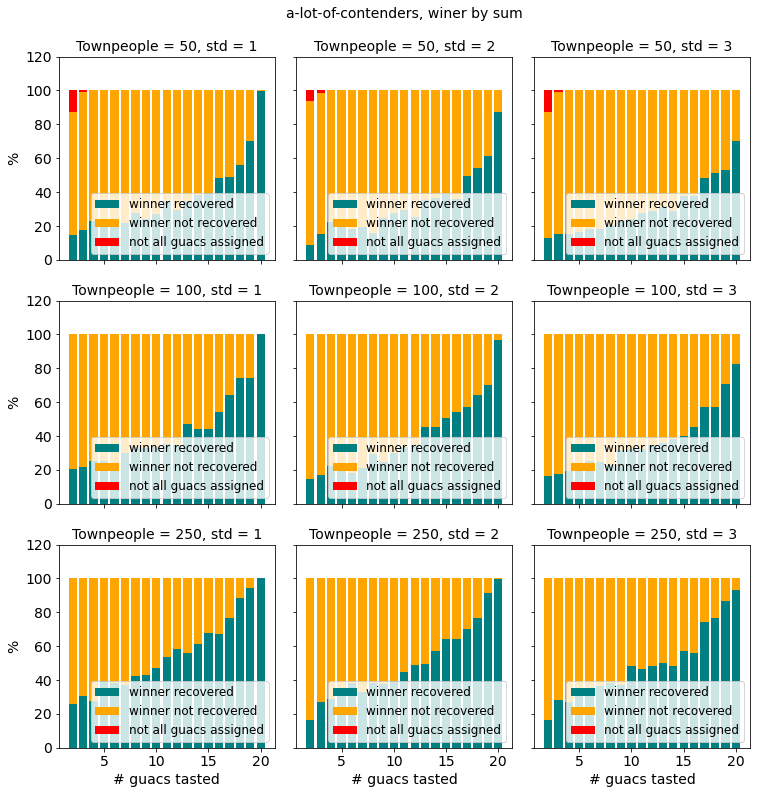

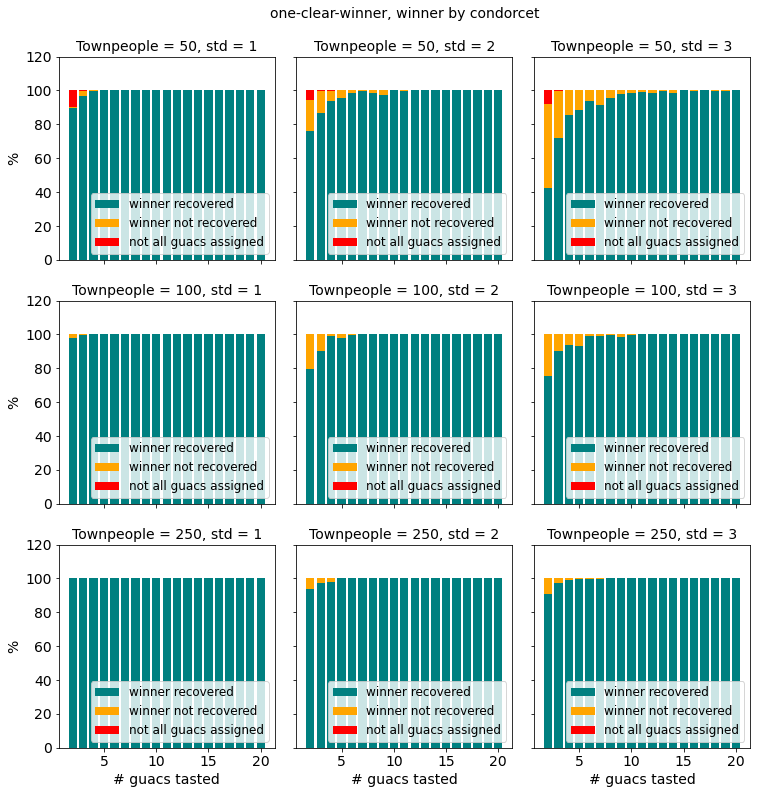

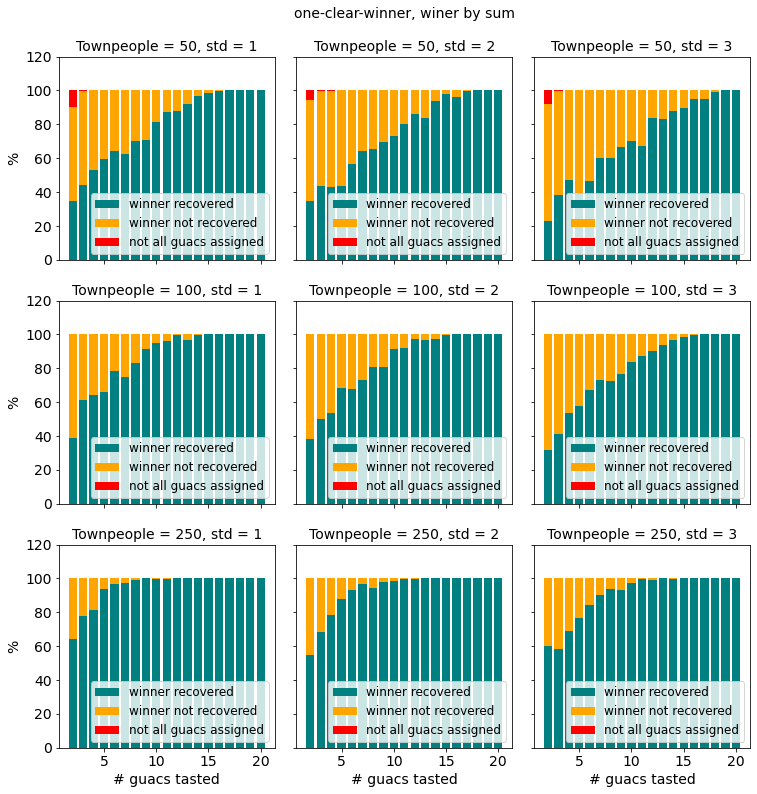

In [20]:


# condorcet_param_space_for_recovering_winner_total_guacs20_one-clear-winner_20220318.csv

files = [
    f"../data/condorcet_param_space_for_recovering_winner_total_guacs20_a-lot-of-contenders_20220318.csv", 
    f"../data/sum_param_space_for_recovering_winner_total_guacs20_a-lot-of-contenders_20220318.csv", 
    f"../data/condorcet_param_space_for_recovering_winner_total_guacs20_one-clear-winner_20220318.csv", 
    f"../data/sum_param_space_for_recovering_winner_total_guacs20_one-clear-winner_20220318.csv", 
        
        ]

for f in files:
    plot_param_space(f)
